<a href="https://www.kaggle.com/code/seanguglietti/world-happiness-correlation?scriptVersionId=290680585" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Objectives of Investigation

**Determine patterns among countries with high and low happiness scores. Analyze what variables seem to impact happiness score the most, both negatively and positively.**

The first thing to do, is import some tools to help our investigation.

In [1]:
# Importing tools for data visualization, data processing, and plotting.

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization, creating detailed graphs
import matplotlib.pyplot as plt # creating plots

print("Importing successful.")

Importing successful.


With our tools, we can load the data from the different world-happiness datasets into pandas DataFrames, from which we will conduct our analysis. 

For this part of the analysis,just the dataset for 2019 will be used. The remaining 4 datasets will also be analyzed.

In [2]:
# Importing the data from the 2019 World Happiness CSV file into a Pandas DataFrame. 

filepath_2019 = '/kaggle/input/world-happiness/2019.csv' # assigns the filepath string to the filepath_2019 variable
df_2019 = pd.read_csv(filepath_2019)  # loading the csv file into a Pandas dataframe

# Metric Meanings

The metrics are estimates of the categories contribution to increasing happiness score, above a hypothetical *least-happy country*, which has a happiness score of 1.85. For example, Finland has a GDP per capita value of 1.34, meaning the economic production of Finland increases their happiness score approximately 1.34 points above "Dystopia's".

*Dystopia* is the hypothetical least-happy country. It's a benchmark for which all countries can be favorably compared, meaning no country can perform more poorly in terms of the six variables. The lowest scores observed for the six variables therefore chategorize Dystopia.

This is crucial information for assessing the data, as it is necessary context to interpret the values. They are estimates, and the variables themselves inherently analyze how much each of the attributes contributes to happiness. A low score in generosity thus does not entail a stingy country, rather that generosity is not something the estimators believe matters in regards to the citizens happiness. 

# Beginning the analysis

To begin, let's look at a description of the 2019 dataset, using the describe() method.

In [3]:
df_2019.describe() # provides important metrics for the entire dataset, such as the mean for the different variables, the standard deviation, max, min, etc.

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


This shows the completeness of the dataset, there are 156 entries for each attribute, however, this does mean that there are 39 countries omitted from this dataset. This is okay, we will look for trends within the available data.

Beyond completeness, there are some important numbers here: 

* 5.407 - This is the average happiness score. We can use this to bisect the dataset into "High" and "Low" happiness score sub-datasets
* 4.544 - This is the 25th percentile, we can use this, along with the 50th percentile, and 75th percentile values, for more specific ranges among sub-datasets
* 7.769 - This is the highest happiness score. 
* 2.853 - This is the lowest happiness score. This is (seemingly) remarkably close to Dystopia's 1.85 value.
* 1.209 - This is the highest mean value for any of the 6 attributes - Social support. This indicates that social support is one of the most powerful predictors of happiness in the country.

Other takeaways: 

* From the averages and maximums, it seems Social support, and GDP per capita are the two "most important" contributions to happiness score.
* Perceptions of corruption, Generosity, and Freedom to make life choices are apparently the "least important" contributions to happiness score.
* Healthy life expectancy falls in betwen the two, it seems to be important contributor to happiness score.
* It seems that GDP per capita at it's extreme can be the most powerful contributor to happiness score, but throughout the rest of the population, Social support is a more powerful contributor. (max GDP > max Social support, but 75%, 50%, and 25% values are greater for Social support. 

# Peeking into the data

We can use the DataFrame.head() method to display the first five entries of the dataset. This should therefore display the five highest ranking countries.

In [4]:
df_2019.head() # Displays the first five rows of the dataset.

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**Observations**:
* The highest score is 7.769, belonging to Finland
     * What makes these Finnish folk so happy?
     * Nothing stands out among the top 5, aside from their relatively low Generosity (interesting)

     
* The top four countries are Nordic countries, with Netherlands being relatively close, geographically. Could this be a climate-related coincidence? Let's quickly take a look at the top 15 and see if that trend continues.


In [5]:
df_2019.loc[(df_2019['Overall rank'] <= 15)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


The inclusion of a couple hotter countries, such as Costa Rica, Australia, New Zealand, and Israel seems to go against the grain a bit here, but I believe that there is a trend here of moderate climates. I'm interested in the correlation between average summer temperatures and happiness score now, which can be achieved by importing a secondary dataset, and splicing the two together.

# Moving along: Charts

Let's make some charts.

The first chart I'm going to make is a correlation heatmap, which will highlight which attributes correlate most strongly with other attributes.

<Axes: >

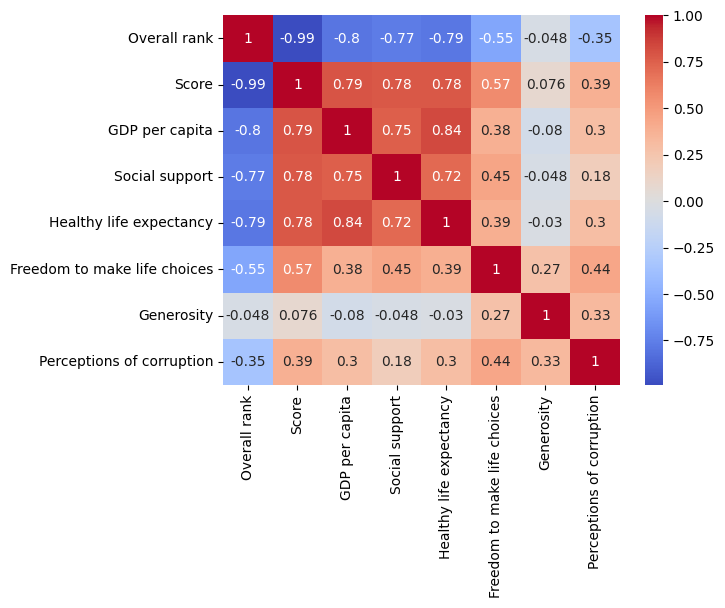

In [6]:
colNames = df_2019.describe().columns # This is a way to get rid of the non-numerical columns, as the describe() method only includes numeric attributes

df_2019corr = df_2019[colNames].corr() # This will make a correlation matrix that we can plot onto a seaborn heatmap

sns.heatmap(data=df_2019corr, cmap = "coolwarm", annot = True) # Creating the graphic, cmap = "coolwarm" makes the palette red and blue.

# Correlation Observations

- This correlation matrix gives us insight into the correlated nature of the different variables. By observing the second row (corresponding to score), we see that, **GDP per capita, Social support, and Healthy life expectancy all have high correlative values of ~ 0.8.  Freedom to make life choices, and Perception of corruption have lesser, but still notable correlative effects on the happiness score.**
- **Generosity has a significantly lower value than the rest of the attributes, it seems essentially negligible to the happiness score.**
- Despite having higher mean values, GDP per capita and Social support both have a correlation magnitude similar to Healthy life expectancy.


# Generosity Investigation

- One of the most notable trends I observed was how little "Generosity" seemed to effect anything. It had near-zero values for almost every value. To investigate further, I'm going to look at regression plots for happiness vs. generosity for countries with above and below average generosity values. This should highlight potential discrepancies in how generosity affects happiness.

Text(0.5, 1.0, 'High Generosity')

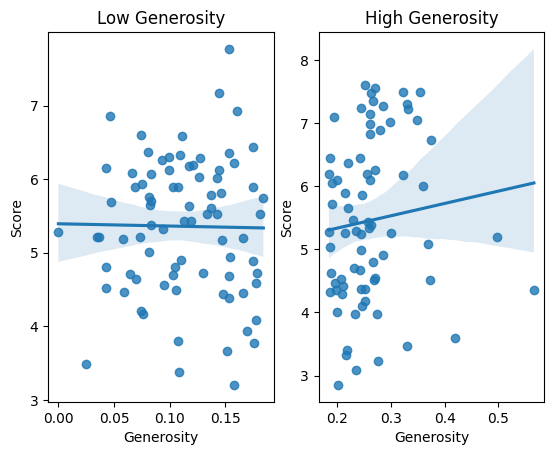

In [7]:
# Creating sub-dataframes for countries with above and below average generosity (using the mean value found using the describe() method.)
high_generosity_df = df_2019.loc[(df_2019.Generosity >= 0.185)].sort_values(by='Generosity', ascending = False) 
low_generosity_df = df_2019.loc[(df_2019.Generosity <0.185)].sort_values(by='Generosity', ascending = True)


fig, axs = plt.subplots(ncols=2)
sns.regplot(data=low_generosity_df, x = low_generosity_df.Generosity, y = low_generosity_df.Score, ax = axs[0]).set_title("Low Generosity")
sns.regplot(data=high_generosity_df, x = high_generosity_df.Generosity, y = high_generosity_df.Score, ax = axs[1]).set_title("High Generosity")

**Observations**

The main conclusion I gather from this data is that generosity is clearly the least predictive attribute for a countries happiness score. A happy country is not necessarily generous, and an unhappy country is not necessarily ungenerous. There is almost no correlation between generosity and happiness score as seen by the near-horizontal lines on the above plots.

Before I move on with generosity, I wanted to see if there was a positive correlation between Generosity and GDP per capita.

<Axes: xlabel='GDP per capita', ylabel='Generosity'>

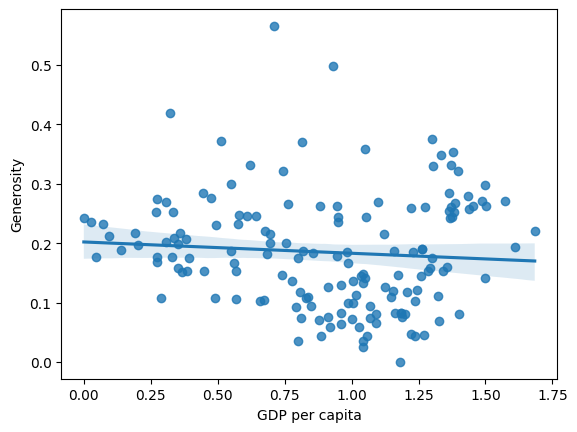

In [8]:
sns.regplot(data=df_2019, x=df_2019["GDP per capita"], y = df_2019.Generosity)

Interesting, it seems that there is a slightly negative correlation between GDP per capita and Generosity, meaning that the more economically successful a country is, the less their generosity affects their happiness score. Much of the positive outliers with Generosity are below average in GDP per capita.

# Healthy Life Expectancy investigation

- Another trend that I thought was interesting, was the fact that healthy life expectancy had a correlation metric nearly identical to GDP, and Social support. I noticed this as an oddity because GDP and Social support both have higher values across the board, and due to the nature of the data, I believed higher values would correlate more closely with happiness scores.

- To investigate this, I want to see the happiness values for countries that rank above-, and below-average in Healthy Life expectancy. **My theory for the seeming-discrepancy is that countries with high happiness scores have high GDPs and high Social Support which enables a higher healthy life expectancy.** 

Text(0.5, 1.0, 'Above-Average HLE')

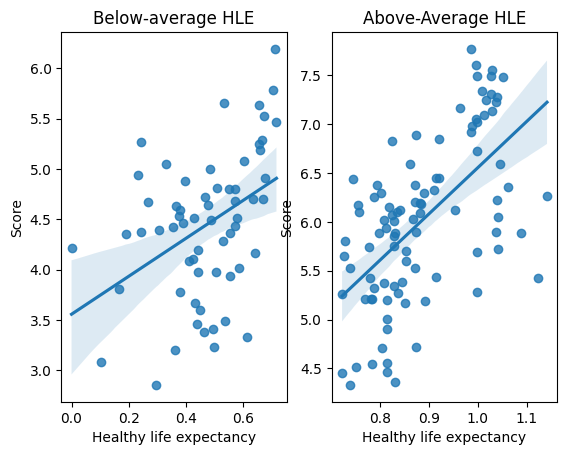

In [9]:
high_HLE_df = df_2019.loc[(df_2019["Healthy life expectancy"] >= 0.72)]
low_HLE_df = df_2019.loc[(df_2019["Healthy life expectancy"] < 0.72)]


fig, axs = plt.subplots(ncols=2)
sns.regplot(data = low_HLE_df, x = low_HLE_df["Healthy life expectancy"], y = low_HLE_df.Score,ax=axs[0]).set_title("Below-average HLE")
sns.regplot(data = high_HLE_df, x = high_HLE_df["Healthy life expectancy"], y = high_HLE_df.Score,ax=axs[1]).set_title("Above-Average HLE")

The clusters of countries in the top right of the first graph to me indicate the correlative effects, almost all of the top countries for happiness rank highly in healthy life expectancy, whereas among the top healthy life expectancy values, there is a wide margin of difference for happiness. 

This graph indicates much of the same for this correlation. The highest countries in happiness score are for the most part the highest countries for HLE, and many of the lower scoring countries have lower HLEs.

Another noteworthy item: simply looking at the automated y-axis ticks indicates the correlation of HLE and happiness, the top 50% of HLE had happiness values between 4.5 and 8 whereas the bottom 50% had a range of 3-6.5. 

**The main observation here is that countries with higher happiness values tend very strongly to have high healthy life expectancies as well, and vice versa for lower healthy life expectancies.**

# Final investigations: GDP and Social Support

These two variables have the highest contribution values, so investigating their correlation to happiness is subsequently very interesting. Are all high-GDP countries happy? Do all high-GDP countries have high Social Support? Are the countries with high-GDP, and low-Social support values happy? Much to investigate... so little time... 

So let's start!

Text(0.5, 1.0, 'Above-Average GDP per capita')

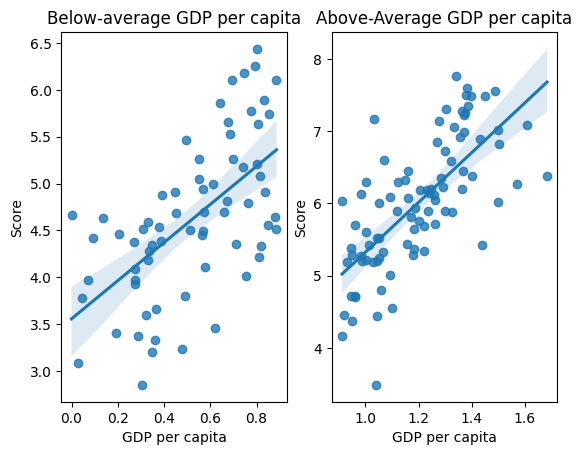

In [10]:
# Initializing above and below average dataframes
high_GDP_df = df_2019.loc[(df_2019["GDP per capita"] >= 0.9)]
low_GDP_df = df_2019.loc[(df_2019["GDP per capita"] < 0.9)]

# Creating 2 plot figures and assigning to them 2 seaborn regplots, with GDP vs. Happiness score
fig, axs = plt.subplots(ncols=2)
sns.regplot(data = low_GDP_df, x = low_GDP_df["GDP per capita"], y = low_GDP_df.Score,ax=axs[0]).set_title("Below-average GDP per capita")
sns.regplot(data = high_GDP_df, x = high_GDP_df["GDP per capita"], y = high_GDP_df.Score,ax=axs[1]).set_title("Above-Average GDP per capita")

This understandably shows agreeance to the theory that economic prosperity is a huge indicator for country happiness. There is a similarly positive trendline for above and below average economies. Since the happiness score is a sum of the different attributes, it is very, very understandable that the attribute with the largest values would have a clear positive correlation with happiness score.

Text(0.5, 1.0, 'Below-average Social support')

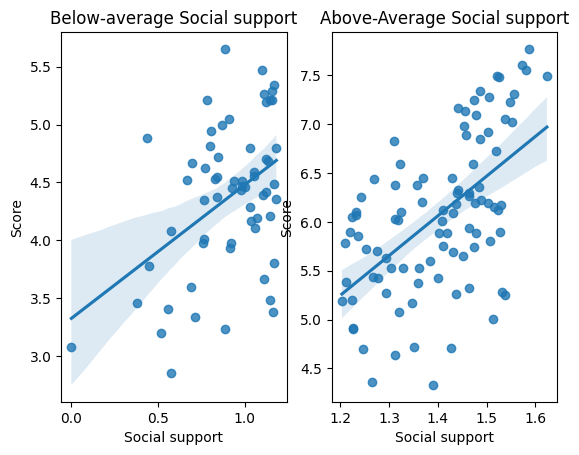

In [11]:
# Initializing above and below average dataframe 
high_SocSup_df = df_2019.loc[(df_2019["Social support"] >= 1.2)]
low_SocSup_df = df_2019.loc[(df_2019["Social support"] < 1.2)]

# Creating 2 plot figures and assigning to them 2 seaborn regplots, with Social Support vs. Happiness score
fig, axs = plt.subplots(ncols=2)
sns.regplot(data = high_SocSup_df, x = high_SocSup_df["Social support"], y = high_SocSup_df.Score,ax=axs[1]).set_title("Above-Average Social support")
sns.regplot(data = low_SocSup_df, x = low_SocSup_df["Social support"], y = low_SocSup_df.Score,ax=axs[0]).set_title("Below-average Social support")

 # Above and Below average happiness scores
 
 * This will look to see if there are any discrepancies in trends between countries with above and below average happiness scores (average ~ 5.4)
 
 

Text(0.5, 1.0, 'Below average')

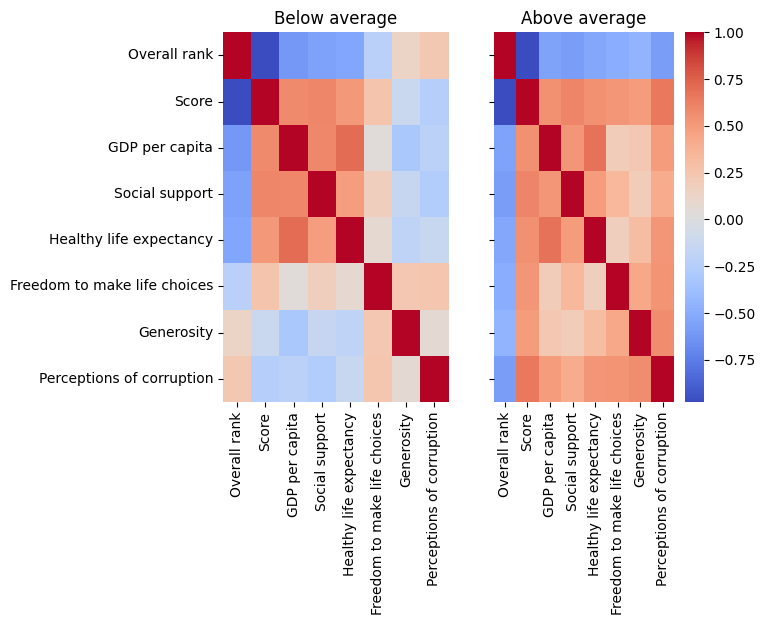

In [12]:
df_High = df_2019.loc[(df_2019.Score > 5.4)]  # creating a sub-dataframe containing only countries with an above average happiness score 
df_Low = df_2019.loc[(df_2019.Score <= 5.4)]  # creating a sub-dataframe containing only countries with a below average happiness score 

fig, axs = plt.subplots(ncols =2, sharey=True)
sns.heatmap(data=df_High[colNames].corr(), cmap="coolwarm", annot=False,ax=axs[1]).set_title("Above average")
sns.heatmap(data=df_Low[colNames].corr(), cmap="coolwarm", annot=False, ax=axs[0],cbar=False).set_title("Below average")

Observations
- There is a difference in correlation among countries with above and below average happiness scores. 
    - There is a more even spread among countries with above average happiness, i.e., Perceptions of corruption correlate quite strongly with happiness score among countries with above average happiness score, but there is a weak, negative correlation for countries with a below average happiness score. 
    - The negative correlation between generosity or perceptions of corruption and happiness score for countries with below average happiness scores likely points to corruption being higher in those countries, and less generosity due to a lower GDP. But this may also highlight inconsistencies in the collection of data for things such as generosity and perceptions of corruption (i.e., differing understandings of corruption and generosity for different countries).
    - The perceptions of corruption correlation with score is quite positive in the Above average graph, this may be due to the fact that the countries with above average happiness already have strong socioeconomic factors (GDP, life expectancy, etc.), so things like corruption and generosity correlate strongly as they are what will push a country higher.

# Conclusions


    - The correlation between generosity and happiness score is insignificant. 
    - GDP per capita, Healthy life expectancy, and Social support are the three strongest predictors of Happiness score. 
    - For a country to have an above average happiness score, they almost always have to have a strong economy, good medical infrastructure, and good social support. 
    - Healthy life expectancy has as strong a positive correlation as GDP and social support despite those two having much higher mean and max values. 
    - Perceptions of corruption, and freedom to make life choices both have minor positive correlative effects.
    - GDP per capita and Generosity had essentially no correlation.
    
# Summary

    This investigation is somewhat flawed due to the nature of the happiness score metric being a sum of the different attributes, making an investigation based around correlative effects a little weird, however, there are some insights to be found through the data. For example, I found the fact that GDP and generosity had no correlation interesting, but this also could be due to differing ideas of generosity, where one country might see being helpful as being generous, some cultures may see being helpful as the status quo. I had hoped for more interesting effects between countries with above and below average values, but most of the correlation graphs were quite similar between the two in terms of correlation. 